In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as mt
import os
import regex as re
import pandas as pd

# Load trajectory and calculate R_E and R_P coordinates for the ribosome simulation

In [ ]:
pdbid='6gxp'
setnum='set5'
traj_dir='/scratch/sandrabyju/hpcfund_everest/PE_output_auto/'+pdbid+'-'+setnum+'/' 
#arr=os.listdir(i)
arr=[j for j in os.listdir(traj_dir) if re.match('(run)',j)]
run_len=[]
path_pdb=traj_dir
for run_i in arr:
    path=traj_dir+run_i+'/output_run/'
    try:
        for fname in os.listdir(path):
            if fname.startswith("Re_dist.txt"):
                os.remove(os.path.join(path, fname))
    except:
        print('no Re_dist')
    try:
        for fname in os.listdir(path):
            if fname.startswith("Rfret_dist.txt"):
                os.remove(os.path.join(path, fname))
    except:
        print('no Rfret_dist')
    try:
        for fname in os.listdir(path):
            if fname.startswith("transition"):
                os.remove(os.path.join(path, fname))
    except:
        print('no transition_step')
    files=os.listdir(path) 
    print(files)
    partnum_dcd=[j for j in files if re.match('(.*)\d.dcd$',j)]
    with open(path+'Re_dist.txt','ab') as f1, open(path+'Rfret_dist.txt','ab') as f2, open(path+'Rp_dist.txt','ab') as f3:
        for part_i in partnum_dcd:
            print(part_i)
            dcd=path+part_i 
            gro = pdbid+'_pre0p05_post0p25_E761p5_enmin.gro'
            try:
                traj1 = mt.load(dcd, top=gro)
            except:
                continue
            print(traj1.xyz.shape)
            atoms_to_keep_A76 = list(range(148703, 148713, 1)) 
            traj1.restrict_atoms(atoms_to_keep_A76) 
            print (traj1.xyz.shape) 
            distances_cm_A76=mt.compute_center_of_mass(traj1) 
            traj2 = mt.load(dcd, top=gro) 
            print(traj2.xyz.shape) 
            atoms_to_keep_Esite = list(range(51984, 51995, 1))+list(range(52007, 52015, 1)) 
            traj2.restrict_atoms(atoms_to_keep_Esite) 
            print (traj2.xyz.shape) 
            distances_cm_Esite=mt.compute_center_of_mass(traj2) 
            Re=np.sqrt(np.sum(np.square(distances_cm_A76-distances_cm_Esite),axis=1)) 
            np.savetxt(f1, Re, delimiter="\n") 
            traj3 = mt.load(dcd, top=gro) 
            print(traj3.xyz.shape) 
            atoms_to_keep_Atrna_U47 = list(range(146455, 146475, 1)) 
            traj3.restrict_atoms(atoms_to_keep_Atrna_U47) 
            print (traj3.xyz.shape) 
            distances_cm_Atrna_U47 = mt.compute_center_of_mass(traj3) 
            traj4 = mt.load(dcd, top=gro) 
            print(traj4.xyz.shape) 
            atoms_to_keep_Ptrna_U8 = list(range(147235, 147255, 1)) 
            traj4.restrict_atoms(atoms_to_keep_Ptrna_U8) 
            print (traj4.xyz.shape) 
            distances_cm_Ptrna_U8 = mt.compute_center_of_mass(traj4) 
            Rfret=np.sqrt(np.sum(np.square(distances_cm_Ptrna_U8-distances_cm_Atrna_U47),axis=1)) 
            np.savetxt(f2, Rfret, delimiter="\n")
            traj5 = mt.load(dcd, top=gro) 
            atoms_to_keep_C75 = list(range(148683, 148691, 1))
            traj5.restrict_atoms(atoms_to_keep_C75)
            distances_cm_C75=mt.compute_center_of_mass(traj5)
            traj6 = mt.load(dcd, top=gro) 
            atoms_to_keep_Psite = list(range(48319, 48330, 1))
            traj6.restrict_atoms(atoms_to_keep_Psite)
            distances_cm_Psite=mt.compute_center_of_mass(traj6)
            Rp=np.sqrt(np.sum(np.square(distances_cm_C75-distances_cm_Psite),axis=1))
            np.savetxt(f3, Rp, delimiter="\n")         
    Re_all=np.loadtxt(path+'Re_dist.txt')
    Rfret_all=np.loadtxt(path+'Rfret_dist.txt')
    Rp_all=np.loadtxt(path+'Rp_dist.txt')
    A=np.where((Re_all<0.2)&(Rfret_all>6.3))[0]
    if len(A)>0: 
        np.savetxt(path+'transition_step.txt', [A[0]])
        run_len.append((run_i,'transition_step',[A[0]]))
    else:
        np.savetxt(path+'no_transition_step.txt', [len(Re_all)])
        run_len.append((run_i,'no_transition_step',len(Re_all)))
with open(path_pdb+pdbid+'_output_.txt', 'w') as fp:
    fp.write('\n'.join('{} {} {}'.format(x[0],x[1],x[2]) for x in run_len))

['OpenSMOG.part1.log', 'OpenSMOG.part2.log', 'checkpnt.chk', 'energy_part1.txt', 'energy_part2.txt', 'energycomp_part1.txt', 'energycomp_part2.txt', 'part1.dcd', 'part2.dcd']
part1.dcd
(35453, 148713, 3)
(35453, 10, 3)
(35453, 148713, 3)
(35453, 19, 3)
(35453, 148713, 3)
(35453, 20, 3)
(35453, 148713, 3)
(35453, 20, 3)
part2.dcd
(49400, 148713, 3)
(49400, 10, 3)
(49400, 148713, 3)
(49400, 19, 3)
(49400, 148713, 3)
(49400, 20, 3)
(49400, 148713, 3)
(49400, 20, 3)
['OpenSMOG.part1.log', 'OpenSMOG.part2.log', 'checkpnt.chk', 'energy_part1.txt', 'energy_part2.txt', 'energycomp_part1.txt', 'energycomp_part2.txt', 'part1.dcd', 'part2.dcd']
part1.dcd
(35381, 148713, 3)
(35381, 10, 3)
(35381, 148713, 3)
(35381, 19, 3)
(35381, 148713, 3)
(35381, 20, 3)
(35381, 148713, 3)
(35381, 20, 3)
part2.dcd
(49435, 148713, 3)
(49435, 10, 3)
(49435, 148713, 3)
(49435, 19, 3)
(49435, 148713, 3)
(49435, 20, 3)
(49435, 148713, 3)
(49435, 20, 3)
['OpenSMOG.part1.log', 'OpenSMOG.part2.log', 'checkpnt.chk', 'ener

In [47]:
pdbid='6gxp'
setnum='set4'
traj_dir='/scratch/sandrabyju/hpcfund_everest/PE_output_auto/'+pdbid+'-'+setnum+'/' 
arr=[j for j in os.listdir(traj_dir) if re.match('(run)',j)]
print(arr)
run_len=[]
path_pdb=traj_dir
for run_i in arr:
    path=traj_dir+run_i+'/output_run/'
    files=os.listdir(path)   
    partnum_dcd=[j for j in files if re.match('(.*)\d.dcd$',j)]
    dcd=path+'part1.dcd'
    gro = pdbid+'_pre0p05_post0p25_E761p5_enmin.gro'
    traj1 = mt.load(dcd, top=gro)
    print(run_i)
    print(traj1.xyz.shape)
    traj_all=traj1
    for part_i in partnum_dcd[1:]:
        dcd=path+part_i 
        gro = pdbid+'_pre0p05_post0p25_E761p5_enmin.gro'
        traj1 = mt.load(dcd, top=gro)
        print(part_i)
        print(traj1.xyz.shape)
        traj_all=traj_all + traj1
    traj_all.save_dcd(path+'part_all.dcd')
    print(traj_all.xyz.shape)

['run0', 'run1', 'run10', 'run11', 'run12', 'run13', 'run14', 'run15', 'run16', 'run17', 'run19', 'run2', 'run20', 'run23', 'run24', 'run27', 'run28', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9']
run0
(1550, 148713, 3)
(1550, 148713, 3)
run1
(1550, 148713, 3)
part2.dcd
(1550, 148713, 3)
(3100, 148713, 3)
run10
(1550, 148713, 3)
part2.dcd
(1550, 148713, 3)
part3.dcd
(1550, 148713, 3)
(4650, 148713, 3)
run11
(1550, 148713, 3)
(1550, 148713, 3)
run12
(1550, 148713, 3)
(1550, 148713, 3)
run13
(1550, 148713, 3)
(1550, 148713, 3)
run14
(1550, 148713, 3)
part2.dcd
(1550, 148713, 3)
part3.dcd
(1550, 148713, 3)
(4650, 148713, 3)
run15
(1550, 148713, 3)
(1550, 148713, 3)
run16
(1550, 148713, 3)
(1550, 148713, 3)
run17
(1550, 148713, 3)
(1550, 148713, 3)
run19
(1550, 148713, 3)
(1550, 148713, 3)
run2
(1550, 148713, 3)
(1550, 148713, 3)
run20
(1550, 148713, 3)
(1550, 148713, 3)
run23
(1550, 148713, 3)
part2.dcd
(1550, 148713, 3)
(3100, 148713, 3)
run24
(1550, 148713, 3)
(1550, 148713, 3

In [49]:
#load trajectories
pdbid='6gxp'
setnum='set4'
sbm_AA_grofile = pdbid+'_pre0p05_post0p25_E761p5_enmin.gro'
traj_dir='/scratch/sandrabyju/hpcfund_everest/PE_output_auto/'+pdbid+'-'+setnum+'/'

arr=[j for j in os.listdir(traj_dir) if re.match('(run)',j)]
with open(traj_dir+pdbid+'_rho_12.txt','ab') as f1:
    for run_i in arr:
        path=traj_dir+run_i+'/output_run/'
        files=os.listdir(path)
        partnum_dcd='part_all.dcd'
        print(partnum_dcd)
        os.remove(os.path.join(path, 'rho_12-'+run_i+'.txt'))
        with open(path+'rho_12-'+run_i+'.txt','ab') as f2:
            dcd=path+partnum_dcd
            gro=sbm_AA_grofile
            traj1 = mt.load(dcd, top=gro)
            print(traj1.xyz.shape)
            index_r3 = np.array([[147135, 146882]])
            index_r75 = np.array([[148679, 146882]])
            dist_r3 = mt.compute_distances(traj1, index_r3)
            dist_r75 = mt.compute_distances(traj1, index_r75)
            rho_12 = (0.4*dist_r3) + (0.6*dist_r75)
            np.savetxt(f2, rho_12, delimiter="\n")
            np.savetxt(f1, rho_12, delimiter="\n") 

part_all.dcd
(1550, 148713, 3)
part_all.dcd
(3100, 148713, 3)
part_all.dcd
(4650, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(4650, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(3100, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(4650, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)
part_all.dcd
(1550, 148713, 3)


In [6]:
#load trajectories
pdbid='6gxp'
setnum='set4'
sbm_AA_grofile = pdbid+'_pre0p05_post0p25_E761p5_enmin.gro'
traj_dir='/scratch/sandrabyju/hpcfund_everest/PE_output_auto/'+pdbid+'-'+setnum+'/'

arr=[j for j in os.listdir(traj_dir) if re.match('(run)',j)]
with open(traj_dir+pdbid+'_Re.txt','ab') as f1, open(traj_dir+pdbid+'_Rp.txt','ab') as f2:
    for run_i in arr:
        path=traj_dir+run_i+'/output_run/'
        files=os.listdir(path)
        with open(path+'Re_dist.txt', 'rb') as source_Re, open(path+'Rp_dist.txt', 'rb') as source_Rp:
            content_Re = source_Re.read()
            content_Rp = source_Rp.read()
        f1.write(content_Re)
        f2.write(content_Rp)

In [8]:
rho_12_all=np.loadtxt('/scratch/sandrabyju/hpcfund_everest/PE_output_auto/6gxp-set4/6gxp_rho_12.txt')
Re_all=np.loadtxt('/scratch/sandrabyju/hpcfund_everest/PE_output_auto/6gxp-set4/6gxp_Re.txt')
Rp_all=np.loadtxt('/scratch/sandrabyju/hpcfund_everest/PE_output_auto/6gxp-set4/6gxp_Rp.txt')
bins=200
z1, xedge = np.histogram(rho_12_all, bins=bins, weights=None)   # calculates histogram
z2, xedge = np.histogram(Re_all, bins=bins, weights=None)
z3, xedge = np.histogram(Rp_all, bins=bins, weights=None)
f = -1*np.log(z1)
x = 0.5 * (xedge[:-1] + xedge[1:])

<ipython-input-8-d078362baf3b>:8: RuntimeWarning: divide by zero encountered in log
  f = -1*np.log(z1)


In [11]:
rho_12_all=np.loadtxt('/scratch/sandrabyju/hpcfund_everest/PE_output_auto/6gxp-set4/6gxp_rho_12.txt')

bins=100
z, xedge = np.histogram(rho_12_all, bins=bins, weights=None)   # calculates histogram
#f = -1*np.log(z)
x = 0.5 * (xedge[:-1] + xedge[1:])


# Free energy landscape for Hybrid state formation

<ipython-input-8-af0d5a5fb194>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt1=plt.pcolormesh(x_mesh, y_mesh, masked_hist, cmap='jet', norm=norm)


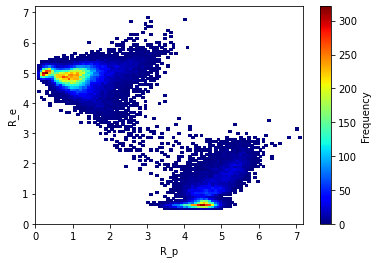

In [8]:
from matplotlib.colors import Normalize
from numpy.ma import masked_array
threshold = 0.5

Re_all=np.loadtxt('/scratch/sandrabyju/hpcfund_everest/PE_output_auto/6gxp-set4/6gxp_Re.txt')
Rp_all=np.loadtxt('/scratch/sandrabyju/hpcfund_everest/PE_output_auto/6gxp-set4/6gxp_Rp.txt')
hist, x_edges, y_edges = np.histogram2d(Re_all, Rp_all, bins=(100, 100))
masked_hist = masked_array(hist, hist < threshold)
norm = Normalize(vmin=0, vmax=hist.max())
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
x_mesh, y_mesh = np.meshgrid(x_centers, y_centers)
plt1=plt.pcolormesh(x_mesh, y_mesh, masked_hist, cmap='jet', norm=norm)
cbar = plt.colorbar(label='Frequency')
#cbar.set_ticks([0, hist.max()])
#cbar.set_ticklabels(['0', f'>{hist.max()}'])
plt.ylim(0,7.2)
plt.xlim(0,7.2)
plt.xlabel('R_p')
plt.ylabel('R_e')
plt.show()
#plt.hist2d(Re_all, Rp_all, bins=(200, 200), cmap='jet')